In [10]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

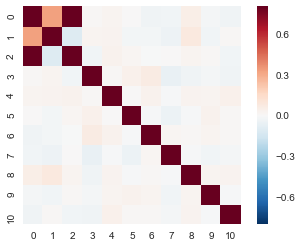

In [19]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [12]:

def pls(X, y, components):
    # Fit a linear model with all 10 features.
    regr = linear_model.LinearRegression()
    regr.fit(X, y)

    # Save predicted values.
    Y_pred = regr.predict(X)
    print('R-squared regression:', regr.score(X, y))

    # Fit a linear model using Partial Least Squares Regression.
    # Reduce feature space to 3 dimensions.
    pls1 = PLSRegression(n_components=components)

    # Reduce X to R(X) and regress on y.
    pls1.fit(X, y)

    # Save predicted values.
    Y_PLS_pred = pls1.predict(X)
    print('R-squared PLSR:', pls1.score(X, y))
    
    # Print the ratio of scores
    print('Ratio PLSR/reg:', pls1.score(X, y)/regr.score(X, y))

    # Compare the predictions of the two models
    plt.scatter(Y_pred,Y_PLS_pred) 
    plt.xlabel('Predicted by original 10 features')
    plt.ylabel('Predicted by {} features'.format(components))
    plt.title('Comparing LR and PLSR predictions')
    plt.show()

R-squared regression: 0.840601094228
R-squared PLSR: 0.839965209465
Ratio PLSR/reg: 0.999243535646


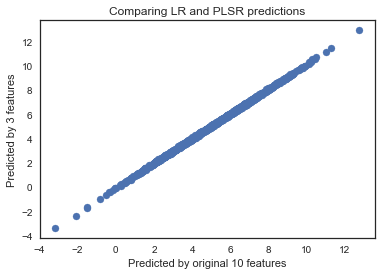

In [13]:
# 3 components 
pls(X, y, 3)
#R-squared regression: 0.8502078872551313
#R-squared PLSR: 0.8502077147786663
#Ratio PLSR/reg: 0.9999997971361269

R-squared regression: 0.840601094228
R-squared PLSR: 0.831974314068
Ratio PLSR/reg: 0.98973736744


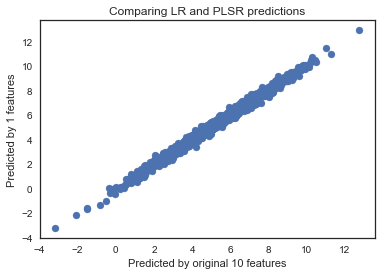

In [14]:
# 1 component 
pls(X, y, 1)
#R-squared regression: 0.8502078872551313
#R-squared PLSR: 0.8445171664584549
#Ratio PLSR/reg: 0.9933066713659305

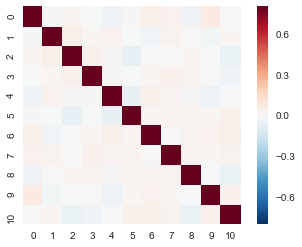

In [20]:

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome non-related to parameters.
y = np.random.lognormal(size=n * 1) 

# Check out correlations. First column is the outcome.
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


R-squared regression: 0.00963123499802
R-squared PLSR: 0.00962825363909
Ratio PLSR/reg: 0.999690448948


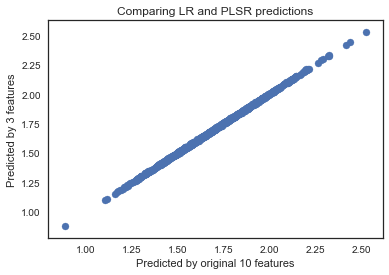

In [16]:
# 3 components 
pls(X, y, 3)
#R-squared regression: 0.011145661704907828
#R-squared PLSR: 0.011145657628810481
#Ratio PLSR/reg: 0.9999996342884384


R-squared regression: 0.00963123499802
R-squared PLSR: 0.00959079261387
Ratio PLSR/reg: 0.995800913989


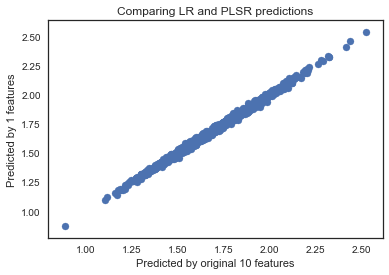

In [17]:
# Let's reduce the number of components
pls(X, y, 1)
#R-squared regression: 0.011145661704907828
#R-squared PLSR: 0.011047349020134933
#Ratio PLSR/reg: 0.9911792868493753

R-squared regression: 0.00963123499802
R-squared PLSR: 0.00962823034446
Ratio PLSR/reg: 0.999688030293


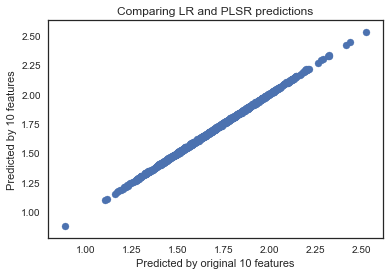

In [18]:
# Let's increase the number of components
pls(X, y, 10)
#R-squared regression: 0.011145661704907828
#R-squared PLSR: 0.011145661704907828
#Ratio PLSR/reg: 1.0